In [1]:
import numpy as np
import imageio
import math
import matplotlib.pyplot as plt
import random
import cv2
from scipy import ndimage


In [2]:
def show_gray(image, min_value=0, max_val=255):
    plt.imshow(image, cmap='gray', vmin=0, vmax=max_val)
    plt.show()

original image


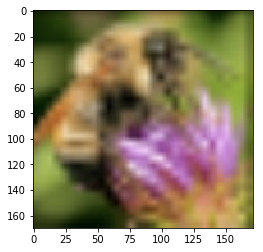

(170, 172, 3)
(170, 685, 3)


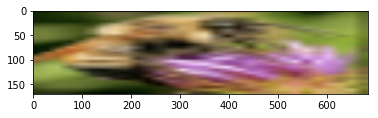

(170, 685, 3)
(677, 685, 3)


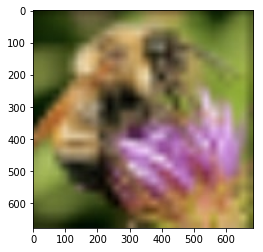

(677, 685, 3)


In [3]:
def interpolateDimension(image, dimension):
    kernal = np.array([[0, 1/4.0, 2/4.0, 3/4.0, 1, 3/4.0, 2/4.0, 1/4.0, 0]])
    copyImage = image
    
    if dimension == 0:
        copyImage = np.rot90(copyImage, 1)
        
    result = np.zeros((copyImage.shape[0], (copyImage.shape[1] - 1) * 4 + 1))
    
    for i in range(copyImage.shape[0]):
        for j in range(copyImage.shape[1]):
            result[i, j * 4] = copyImage[i, j]
            
        
    result2 = cv2.filter2D(result, -1, kernal)
        
    if dimension == 0:
        result2 = np.rot90(result2, 3)
        
    return result2
        
        
def colorInterpolation(image, dimension):
    r, g, b = cv2.split(image)
    interPolatedB1 = interpolateDimension(r, dimension)
    interPolatedG1 = interpolateDimension(g, dimension)
    interPolatedR1 = interpolateDimension(b, dimension)

    interPolatedImage1 = cv2.merge((interPolatedB1 , interPolatedG1, interPolatedR1))
    
    print(interPolatedImage1.shape)

    
    plt.imshow(interPolatedImage1/255.0, vmin=0, vmax=1)
    plt.show()
    
    return interPolatedImage1
                
    
print("original image")
image = cv2.imread("bee.jpg")

b, g, r = cv2.split(image)
image = cv2.merge((r, g, b))

plt.imshow(image, vmin=0, vmax=255)
plt.show()
print(image.shape)

interPolatedImage1 = colorInterpolation(image, 1)
plt.imsave("bee_horizontal.jpg", interPolatedImage1/255.0)
print(interPolatedImage1.shape)
      
    
interPolatedImage2 = colorInterpolation(interPolatedImage1, 0)
plt.imsave("bee_vertical.jpg", interPolatedImage2/255.0)
print(interPolatedImage2.shape)

original image


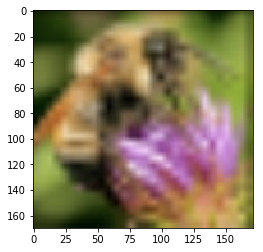

(170, 172, 3)
interpolating 2D
[[0.     0.     0.     0.     0.     0.     0.     0.     0.    ]
 [0.     0.0625 0.125  0.1875 0.25   0.1875 0.125  0.0625 0.    ]
 [0.     0.125  0.25   0.375  0.5    0.375  0.25   0.125  0.    ]
 [0.     0.1875 0.375  0.5625 0.75   0.5625 0.375  0.1875 0.    ]
 [0.     0.25   0.5    0.75   1.     0.75   0.5    0.25   0.    ]
 [0.     0.1875 0.375  0.5625 0.75   0.5625 0.375  0.1875 0.    ]
 [0.     0.125  0.25   0.375  0.5    0.375  0.25   0.125  0.    ]
 [0.     0.0625 0.125  0.1875 0.25   0.1875 0.125  0.0625 0.    ]
 [0.     0.     0.     0.     0.     0.     0.     0.     0.    ]]
[[0.     0.     0.     0.     0.     0.     0.     0.     0.    ]
 [0.     0.0625 0.125  0.1875 0.25   0.1875 0.125  0.0625 0.    ]
 [0.     0.125  0.25   0.375  0.5    0.375  0.25   0.125  0.    ]
 [0.     0.1875 0.375  0.5625 0.75   0.5625 0.375  0.1875 0.    ]
 [0.     0.25   0.5    0.75   1.     0.75   0.5    0.25   0.    ]
 [0.     0.1875 0.375  0.5625 0.75   0.5625 

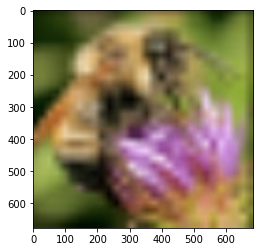

(677, 685, 3)


In [4]:
def Interpolation2D(image):
    kernal1D = np.array([[0, 1/4.0, 2/4.0, 3/4.0, 1, 3/4.0, 2/4.0, 1/4.0, 0]])
    kernal2D = np.outer(kernal1D, kernal1D.T)
    
    print(kernal2D)
    
    copyImage = np.copy(image)
    result = np.zeros(((copyImage.shape[0] - 1) * 4 + 1, (copyImage.shape[1] - 1) * 4 + 1))
    
    for i in range(copyImage.shape[0]):
        for j in range(copyImage.shape[1]):
            result[i * 4, j * 4] = copyImage[i, j]

    interpolatedImage = np.clip(cv2.filter2D(result, -1, kernal2D), 0, 255)
    
    return interpolatedImage

def colorInterpolation2D(image):
    r, g, b = cv2.split(image)
    interPolatedB1 = Interpolation2D(r)
    interPolatedG1 = Interpolation2D(g)
    interPolatedR1 = Interpolation2D(b)

    interPolatedImage1 = cv2.merge((interPolatedB1 , interPolatedG1, interPolatedR1))
    
    print(interPolatedImage1.shape)

    
    plt.imshow(interPolatedImage1/255.0, vmin=0, vmax=1)
    plt.show()
    
    return interPolatedImage1

print("original image")
image = cv2.imread("bee.jpg")

b, g, r = cv2.split(image)
image = cv2.merge((r, g, b))

plt.imshow(image, vmin=0, vmax=255)
plt.show()
print(image.shape)

print("interpolating 2D")
interPolatedImage2D = colorInterpolation2D(image)
print(interPolatedImage2D.shape)
plt.imsave("beeinter2D.jpg", interPolatedImage2D/255.0)

In [5]:
def checkMaxima(matrix, i, j):
    leftCornerI = max(0, i - 1)
    leftCornerJ = max(0, j - 1)
    
    rightCornerI = min(image.shape[0] - 1, i + 1)
    rightCornerJ = min(image.shape[1] - 1, j + 1)
    
    subMatrix = matrix[leftCornerI:rightCornerI + 1, leftCornerJ:rightCornerJ + 1]
    
    try:
        maximum = np.amax(subMatrix)
    except ValueError:
        return True
    
    return matrix[i, j] == np.amax(subMatrix)


def cornerDetector(image, alpha, R_function, threshold):
    copyImage = np.copy(image)
    mask = np.zeros(image.shape)
    
    Ix = np.gradient(copyImage, axis=0)
    Iy = np.gradient(copyImage, axis=1)
    
    IxIx = Ix *Ix
    IyIy = Iy * Iy
    IxIy = Ix * Iy
    
    IxIxGauss = cv2.GaussianBlur(IxIx, (7, 7), 10)
    IyIyGauss = cv2.GaussianBlur(IyIy, (7, 7), 10)
    IxIyGauss = cv2.GaussianBlur(IxIy, (7, 7), 10)
    
    det = np.multiply(IxIxGauss, IyIyGauss) - np.multiply(IxIyGauss,IxIyGauss)
    trace = IxIxGauss + IyIyGauss
    
    if (R_function == "harris"):
        R = det - alpha * trace
    else:
        R = np.divide(det, trace, where=trace!=0)
        
    
    
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            
            if (abs(R[i, j]) > threshold and checkMaxima(R, i, j)):
                mask[i, j] = 1
                cv2.circle(copyImage, (j, i), 7, (0, 0, 0), -1)
                
    return copyImage


def cornerDetectorEigenValues(image, alpha, R_function, threshold):
    copyImage = np.copy(image)
    mask = np.zeros(image.shape)
    
    Ix = np.gradient(copyImage, axis=0)
    Iy = np.gradient(copyImage, axis=1)
    
    IxIx = Ix *Ix
    IyIy = Iy * Iy
    IxIy = Ix * Iy
    
    IxIxGauss = cv2.GaussianBlur(IxIx, (7, 7), 10)
    IyIyGauss = cv2.GaussianBlur(IyIy, (7, 7), 10)
    IxIyGauss = cv2.GaussianBlur(IxIy, (7, 7), 10)
    
    M = np.array([[IxIxGauss, IyIyGauss], 
                 [IxIyGauss, IyIyGauss]])
    
    
    M = np.swapaxes(M, 0, 2)
    M = np.swapaxes(M, 1, 3)
    
    eigVal, eigVec = np.linalg.eig(M)
    
    val1 = eigVal[:, :, 0]
    val2 = eigVal[:, :, 1]
    
    det = val1* val2
    trace = (val1 + val2)
    
    if (R_function == "harris"):
        R = det - alpha * trace
    else:
        R = np.divide(det , trace, where=trace!=0)
        
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            
            if (abs(R[i, j]) > threshold and checkMaxima(R, i, j)):
                mask[i, j] = 1
                cv2.circle(copyImage, (j, i), 7, (0, 0, 0), -1)
                
    return copyImage


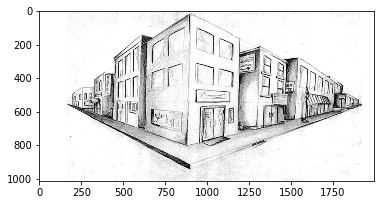

eigenValues
alpha value 0.04
harris


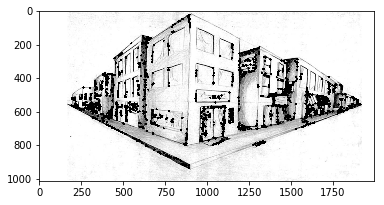

brown


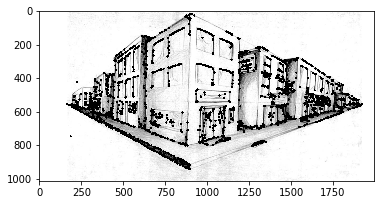

alpha value 0.05
harris


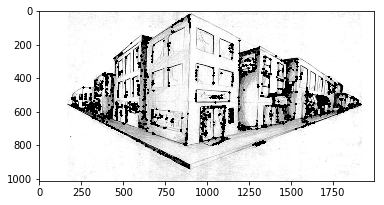

brown


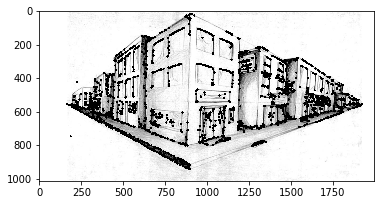

alpha value 0.06
harris


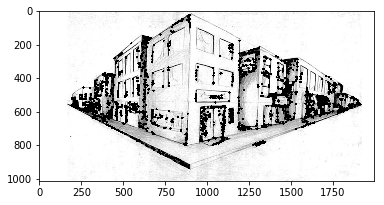

brown


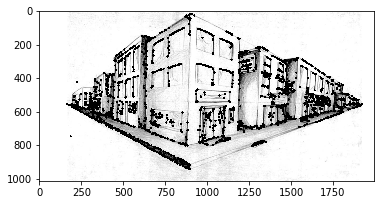

In [6]:

image = cv2.imread("building.jpg", cv2.IMREAD_GRAYSCALE)
image = image / 255.0

plt.imshow(image, cmap='gray', vmin=0, vmax=1)
plt.show()


print("eigenValues")
print("alpha value 0.04")
print("harris")
mask = cornerDetectorEigenValues(image, 0.04, "harris", 0.0001)
plt.imshow(mask, cmap='gray', vmin=0, vmax=1)
plt.show()
print("brown")
mask = cornerDetectorEigenValues(image, 0.04, "brown", 0.0016)
plt.imshow(mask, cmap='gray', vmin=0, vmax=1)
plt.show()

print("alpha value 0.05")
print("harris")
mask = cornerDetectorEigenValues(image, 0.05, "harris", 0.0001)
plt.imshow(mask, cmap='gray', vmin=0, vmax=1)
plt.show()
print("brown")
mask = cornerDetectorEigenValues(image, 0.05, "brown", 0.0016)
plt.imshow(mask, cmap='gray', vmin=0, vmax=1)
plt.show()


print("alpha value 0.06")
print("harris")
mask = cornerDetectorEigenValues(image, 0.06, "harris", 0.0001)
plt.imshow(mask, cmap='gray', vmin=0, vmax=1)
plt.show()
print("brown")
mask = cornerDetectorEigenValues(image, 0.06, "brown", 0.0016)
plt.imshow(mask, cmap='gray', vmin=0, vmax=1)
plt.show()

alpha value 0.04
harris


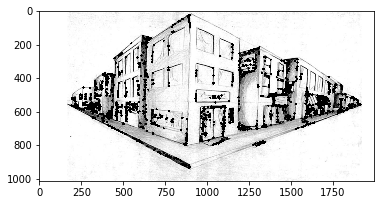

brown


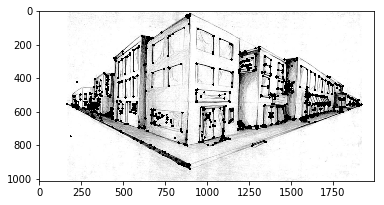

alpha value 0.05
harris


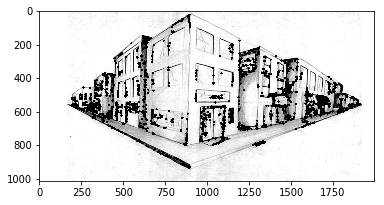

brown


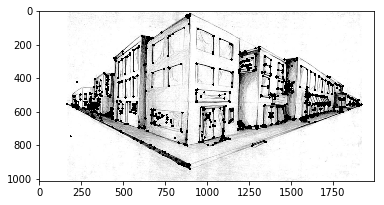

alpha value 0.06
harris


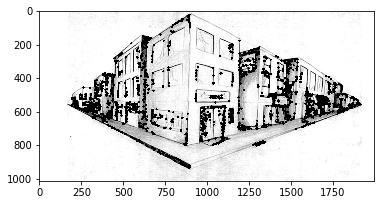

brown


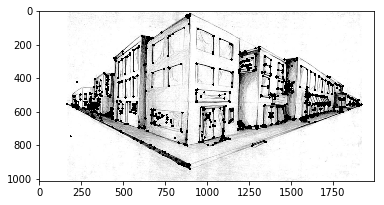

In [7]:
print("alpha value 0.04")
print("harris")
mask = cornerDetector(image, 0.04, "harris", 0.0001)
plt.imshow(mask, cmap='gray', vmin=0, vmax=1)
plt.show()
print("brown")
mask = cornerDetector(image, 0.04, "brown", 0.0016)
plt.imshow(mask, cmap='gray', vmin=0, vmax=1)
plt.show()

print("alpha value 0.05")
print("harris")
mask = cornerDetector(image, 0.05, "harris", 0.0001)
plt.imshow(mask, cmap='gray', vmin=0, vmax=1)
plt.show()
print("brown")
mask = cornerDetector(image, 0.05, "brown", 0.0016)
plt.imshow(mask, cmap='gray', vmin=0, vmax=1)
plt.show()


print("alpha value 0.06")
print("harris")
mask = cornerDetector(image, 0.06, "harris", 0.0001)
plt.imshow(mask, cmap='gray', vmin=0, vmax=1)
plt.show()
print("brown")
mask = cornerDetector(image, 0.06, "brown", 0.0016)
plt.imshow(mask, cmap='gray', vmin=0, vmax=1)
plt.show()

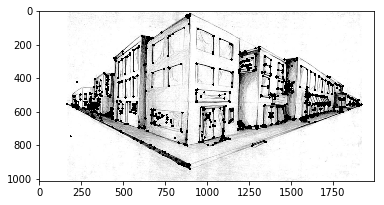

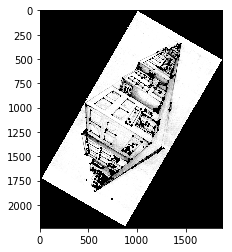

In [8]:
mask = cornerDetector(image, 0.05, "brown", 0.0016)
plt.imshow(mask, cmap='gray', vmin=0, vmax=1)
plt.show()

rotateImage60 = ndimage.interpolation.rotate(image, 60)
mask = cornerDetector(rotateImage60, 0.05, "brown", 0.0016)
plt.imshow(mask, cmap='gray', vmin=0, vmax=1)
plt.show()

In [9]:

def checkMaxima3D(matrix, i, j, z):
    leftCornerI = max(0, i - 1)
    leftCornerJ = max(0, j - 1)
    
    rightCornerI = min(image.shape[0] - 1, i + 1)
    rightCornerJ = min(image.shape[1] - 1, j + 1)
    
    subMatrix = matrix[leftCornerI:rightCornerI + 1, leftCornerJ:rightCornerJ + 1, :]
    
    try:
        maximum = np.amax(subMatrix)
    except ValueError:
        return True
    return matrix[i, j, z] == np.amax(subMatrix)


def findScaleInvariantPoints(image):
    sigmas = []
    
    for i in range(10, 31):
        sigmas.append(i)
    
    copyImage = np.copy(image)
    laplacianArray = np.zeros((image.shape[0], image.shape[1], len(sigmas)))
    
    for i in range(len(sigmas)):
        sigma = sigmas[i]
        ksize = 5
        
        x = cv2.GaussianBlur(copyImage, (ksize, ksize), sigma)
        y = cv2.Laplacian(x, cv2.CV_16S, ksize=ksize)
        laplacianArray[:, : , i] = y

    indices = np.argwhere(laplacianArray > 1700.0)
    
    interestPoints = {}
    
    for x, y, z in indices:
        if checkMaxima3D(laplacianArray, x, y, z):
            if (x, y) not in interestPoints:
                interestPoints[(x, y)] = sigmas[z]
            else:
                interestPoints[(x, y)] = max(sigmas[z], interestPoints[(x, y)])
                
    for x, y in interestPoints:
        cv2.circle(copyImage, (y, x), interestPoints[(x, y)], (0, 0, 0), 2)
            
    return copyImage

        
    
    
    

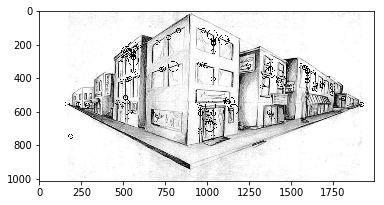

1991619


In [10]:
        
image = cv2.imread("building.jpg", cv2.IMREAD_GRAYSCALE)   
image2 = findScaleInvariantPoints(image)
show_gray(image2)
plt.imsave("building_laplacian.jpg", image2, cmap='gray')

print(np.sum(image2 != 0))

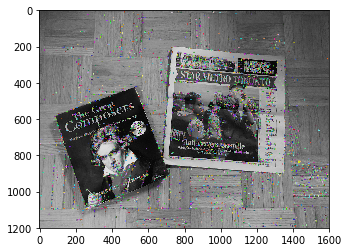

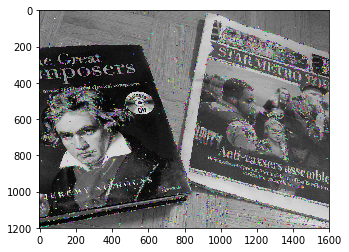

(7339, 128) (9085, 128)


In [11]:
image1 = cv2.imread("sample1.jpg", cv2.IMREAD_GRAYSCALE)
image2 = cv2.imread("sample2.jpg", cv2.IMREAD_GRAYSCALE)

sift = cv2.xfeatures2d.SIFT_create()
kp1 = sift.detect(image1,None)
img= cv2.drawKeypoints(image1,kp1,image1)

kp2 = sift.detect(image2,None)
img2= cv2.drawKeypoints(image2,kp2,image2)

show_gray(img)
show_gray(img2)

kp1,des1 = sift.compute(image1,kp1)
kp2,des2 = sift.compute(image2,kp2)

print(des1.shape, des2.shape)

In [12]:
def getMatchDistances(des1, des2, dist_mode=2):
    distances = np.zeros((des1.shape[0], des2.shape[0]))
    
    for i in range(distances.shape[0]):
        for j in range(distances.shape[1]):
            if dist_mode < 3:
                distances[i, j] = cv2.norm(des2[j] - des1[i], dist_mode)
            else:
                distances[i, j] = np.linalg.norm(des2[j] - des1[i], dist_mode)
            
    return distances
    
    

In [13]:
distances_L2 = getMatchDistances(des1, des2)
print(np.sum(distances_L2 != 0))

66674815


(4.991630554199219, 734.2791748046875)


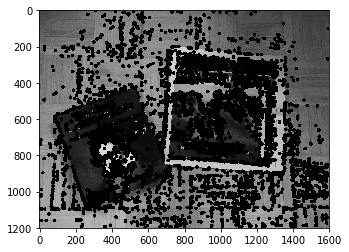

In [14]:
print(kp1[0].pt)
copyImage = np.copy(image1)

for i in range(len(kp1)):
    cv2.circle(copyImage, (round(kp1[i].pt[0]), round(kp1[i].pt[1])), 10, (0, 0, 0), -1)

show_gray(copyImage)

In [15]:
def getDistanceRatios(distances):
    copyDistances = np.copy(distances)
    
    SD_index = np.argmin(copyDistances, 1)
    SD_dist = np.partition(copyDistances, 2, 1)[:, :2]
    
    ratios = np.divide(SD_dist[:, 0], SD_dist[:, 1])
    
    
    return ratios, SD_index
        
    

In [16]:
ratios, indices = getDistanceRatios(distances_L2)

In [17]:
def getGoodMatches(ratios, indices, kp1, kp2, threshold):
    matches = []

    for i in range(ratios.shape[0]):
        if ratios[i] < threshold:
            point1 = (round(kp1[i].pt[0]), round(kp1[i].pt[1]))
            i2 = indices[i]
            point2 = (round(kp2[i2].pt[0]), round(kp2[i2].pt[1]))
            matches.append((point1, point2, ratios[i]))
            
    return matches

In [18]:

matches = getGoodMatches(ratios, indices, kp1, kp2, 0.35)
print(len(matches))

48


In [19]:
def get10Matches(matches):
    def rat(elem):
        return elem[2]

    matches_10 = matches
    matches_10.sort(key=rat)
    matches_10 = matches_10[:11]
    
    return matches_10

matches_10 = get10Matches(matches)

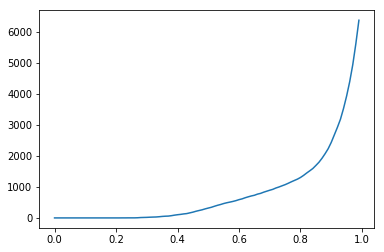

In [20]:
def graph_threshold(ratios, indices, kp1, kp2):
    x_values = []
    y_values = []
    thresholds = range(0, 100)

    for i in range(len(thresholds)):
        x_values.append(thresholds[i]/100.0)
        y_values.append(len(getGoodMatches(ratios, indices, kp1, kp2, thresholds[i]/100.0)))

    plt.plot(x_values, y_values)
    plt.show()
    
graph_threshold(ratios, indices, kp1, kp2)

In [21]:
def createSideBySide(image1, image2):
    result = np.zeros((max(image1.shape[0], image2.shape[0]), image1.shape[1] + image2.shape[1]))

    for i in range(image1.shape[0]):
        for j in range(image1.shape[1]):
            result[i, j] = image1[i, j]
            
    for i in range(image2.shape[0]):
        for j in range(image2.shape[1]):
            result[i, j + image1.shape[1]] = image2[i, j]
    return result

def createSideBySideColor(image1, image2):
    result = np.zeros((max(image1.shape[0], image2.shape[0]), image1.shape[1] + image2.shape[1], 3))

    for i in range(image1.shape[0]):
        for j in range(image1.shape[1]):
            result[i, j, :] = image1[i, j, :]
            
    for i in range(image2.shape[0]):
        for j in range(image2.shape[1]):
            result[i, j + image1.shape[1], :] = image2[i, j, :]
            
    #show_gray(result)
    
    return result

In [22]:
sideBySide = createSideBySide(image1, image2)

In [23]:
def showMatches(matches, sideBySide, offset):
    copyImage = np.copy(sideBySide)
    
    for point1, point2, ratio in matches:
        cv2.line(copyImage, point1, (point2[0] + offset, point2[1]), (0,0,0), 5)
    
    show_gray(copyImage)
    
    return copyImage


def showMatchesColor(matches, sideBySide, offset):
    copyImage = np.copy(sideBySide)
    
    for point1, point2, ratio in matches:
        cv2.line(copyImage, point1, (point2[0] + offset, point2[1]), (255,255,255), 5)
    
    plt.imshow(copyImage)
    plt.show()
    
    return copyImage

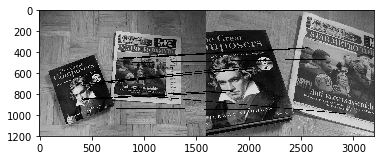

In [24]:
matchImage = showMatches(matches_10, sideBySide, image1.shape[1])
plt.imsave("matches.jpg", matchImage, cmap='gray')

In [25]:
distances_L1 = getMatchDistances(des1, des2, 1)
print(np.sum(distances_L1 != 0))

66674815


In [26]:
distances_L3 = getMatchDistances(des1, des2, 3)
print(np.sum(distances_L3 != 0))

66674815


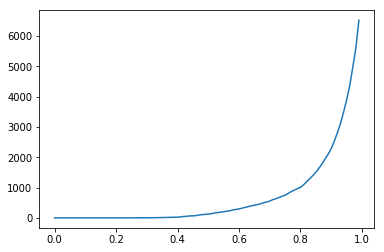

In [27]:
ratios1, indices1 = getDistanceRatios(distances_L1)
graph_threshold(ratios1, indices1, kp1, kp2)

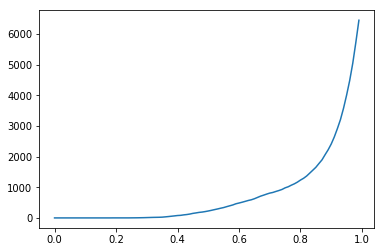

In [28]:
ratios3, indices3 = getDistanceRatios(distances_L3)
graph_threshold(ratios3, indices3, kp1, kp2)

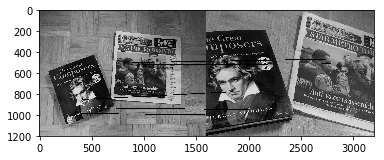

In [29]:
matches1 = get10Matches(getGoodMatches(ratios1, indices1, kp1, kp2, 0.3))
matchImage1 = showMatches(matches1, sideBySide, image1.shape[1])
plt.imsave("matches_L1.jpg", matchImage1, cmap='gray')

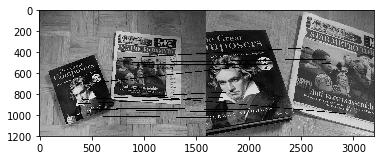

In [30]:
matches3 = get10Matches(getGoodMatches(ratios3, indices3, kp1, kp2, 0.3))
matchImage3 = showMatches(matches3, sideBySide, image1.shape[1])
plt.imsave("matches_L3.jpg", matchImage3, cmap='gray')

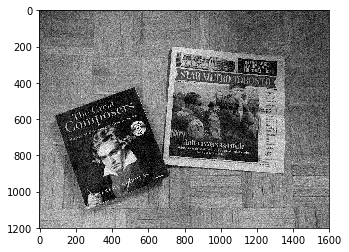

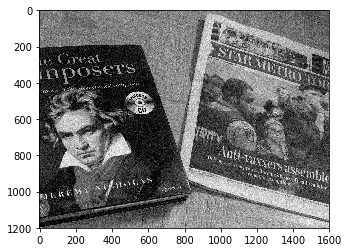

In [31]:
image1_noise = image1/255.0
image2_noise = image2/255.0

noise1 = np.random.normal(0, 0.08, image1_noise.shape)
noise2 = np.random.normal(0, 0.08, image2_noise.shape)

image1_noise = image1_noise + noise1
image2_noise = image2_noise + noise2

image1_noise = np.clip(image1_noise, 0, 1)
image2_noise = np.clip(image2_noise, 0, 1)

show_gray(image1_noise, max_val=1)
show_gray(image2_noise, max_val=1)

plt.imsave("image1_noise.jpg", image1_noise, cmap='gray')
plt.imsave("image2_noise.jpg", image2_noise, cmap='gray')

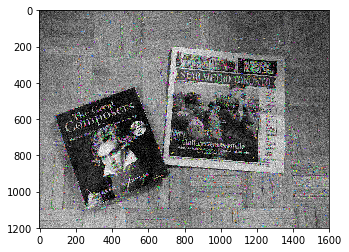

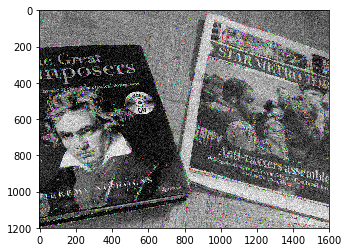

(9831, 128) (11163, 128)


In [32]:
image1_noise = cv2.imread("image1_noise.jpg", cv2.IMREAD_GRAYSCALE)
image2_noise = cv2.imread("image2_noise.jpg", cv2.IMREAD_GRAYSCALE)

kp1_noise = sift.detect(image1_noise,None)
img_noise= cv2.drawKeypoints(image1_noise,kp1,image1_noise)

kp2_noise = sift.detect(image2_noise,None)
img2_noise= cv2.drawKeypoints(image2_noise,kp2,image2_noise)

show_gray(img_noise)
show_gray(img2_noise)

plt.imsave("noise_detetion1.jpg", img_noise)
plt.imsave("noise_detetion2.jpg", img2_noise)

kp1_noise,des1_noise = sift.compute(image1_noise,kp1_noise)
kp2_noise,des2_noise = sift.compute(image2_noise,kp2_noise)

print(des1_noise.shape, des2_noise.shape)

In [33]:
distances_L2_noise = getMatchDistances(des1_noise, des2_noise)

In [34]:
ratios_noise, indices_noise = getDistanceRatios(distances_L2_noise)
matches_noise = get10Matches(getGoodMatches(ratios_noise, indices_noise, kp1_noise, kp2_noise, 0.35))

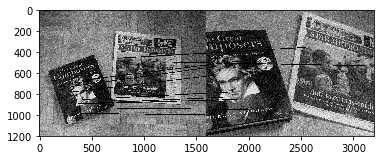

In [35]:
sideBySideNoise = createSideBySide(image1_noise, image2_noise)
matchImageNoise = showMatches(matches_noise, sideBySideNoise, image1.shape[1])
plt.imsave("matches_noise.jpg", matchImageNoise, cmap='gray')

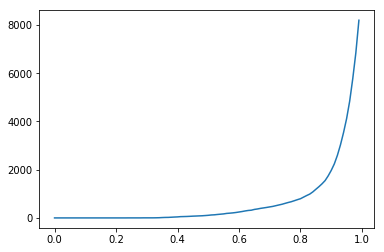

In [36]:
graph_threshold(ratios_noise, indices_noise, kp1_noise, kp2_noise)

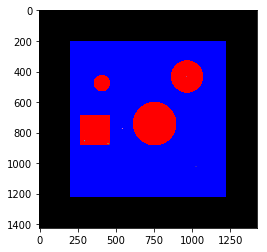

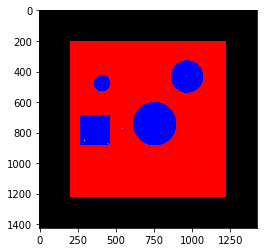

In [37]:
colorTemp = cv2.imread("colourTemplate.png")
colorSearch = cv2.imread("colourSearch.png")

kp1_color = sift.detect(colorTemp,None)
img_color= cv2.drawKeypoints(colorTemp,kp1_color,colorTemp)

kp1_color, des1_color = sift.compute(colorTemp, kp1_color, colorTemp)

kp2_color = sift.detect(colorSearch,None)
img_color2= cv2.drawKeypoints(colorSearch,kp2_color,colorSearch)

kp2_color, des2_color = sift.compute(colorSearch, kp2_color, colorSearch)

plt.imshow(colorTemp, cmap='gray')
plt.show()

b1, g1, r1 = cv2.split(colorTemp)
b2, g2, r2 = cv2.split(colorSearch)

kptemp = []
kpsearch = []

plt.imshow(cv2.cvtColor(colorTemp, cv2.COLOR_BGR2RGB))
plt.show()


In [38]:
def getSubMatrix(matrix, i, j):
    topLeftI = max(0, i - 8)
    topLeftJ = max(0, j - 8)
    bottomRightI = min(matrix.shape[0] - 1, i + 8)
    bottomRightJ = min(matrix.shape[1] - 1, j + 8)
    
    return matrix[topLeftI:bottomRightI + 1,topLeftJ:bottomRightJ+1]

def addColorHisto(des, kp, img):
    histogram = np.zeros((des.shape[0], 3))
    b, g, r = cv2.split(img)
    for i in range(des.shape[0]):
        pt = kp[i].pt
        point = (round(pt[1]), round(pt[0]))
        
        sub = getSubMatrix(b, point[0], point[1])
        for i in range(sub.shape[0]):
            for j in range(sub.shape[1]):
                histogram[i, 0] += sub[i, j]
                
        sub = getSubMatrix(g, point[0], point[1])
        for i in range(sub.shape[0]):
            for j in range(sub.shape[1]):
                histogram[i, 1] += sub[i, j]
                
        sub = getSubMatrix(r, point[0], point[1])
        for i in range(sub.shape[0]):
            for j in range(sub.shape[1]):
                histogram[i, 2] += sub[i, j]
                
    des = np.concatenate([des, histogram], 1)
    
    return des
                    
                
        
        
    

In [39]:
newDes = addColorHisto(des1_color, kp1_color, colorTemp)
newDes2 = addColorHisto(des2_color, kp2_color, colorSearch)
print(newDes.shape, newDes2.shape)

(30, 131) (41, 131)


In [40]:
distances_color = getMatchDistances(newDes, newDes2)


In [45]:
ratios_color, indices_color = getDistanceRatios(distances_color)
matches_color = getGoodMatches(ratios_color, indices_color, kp1_color, kp2_color, 0.6)

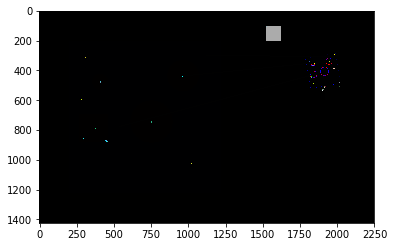

In [46]:
sideBySideColor = createSideBySideColor(colorTemp, colorSearch)
matchImageColor = showMatchesColor(matches_color, sideBySideColor, colorTemp.shape[1])

b, g, r = cv2.split(matchImageColor)
matchImageColor = cv2.merge((r, g, b))

plt.imsave("match_color.jpg", matchImageColor/255.0, vmax=1)
